# Reaxff Manual

This document contains all the general ReaxFF functions and suggestions for parametrisation of the force field. 
            

## 1.Overall System Energy
 The overall expression of energy is written below:

$$E_{system}= E_{bond}+E_{lp}+E_{over}+E_{under}+E_{val}+E_{tor}+E_{vdw}+E_{coulumb}$$

## 2.Nonbonded Interaction
These interactions comprise of Van der waals and Coulumb forces. They are included for all atom pairs thus avoiding awkward alterations in the energy description during bond dissociation. These interactions are based on **distance** between atoms instead of bond orders. 
### Taper Correction
The Tap correction is used to cut off long tails of non bonded interactions. 
$$Tap=\sum_{i=0}^{7}Tap_{i}\cdot r_{ij}^{i}$$
The R_cut is usully 10Å.

<IPython.core.display.Javascript object>


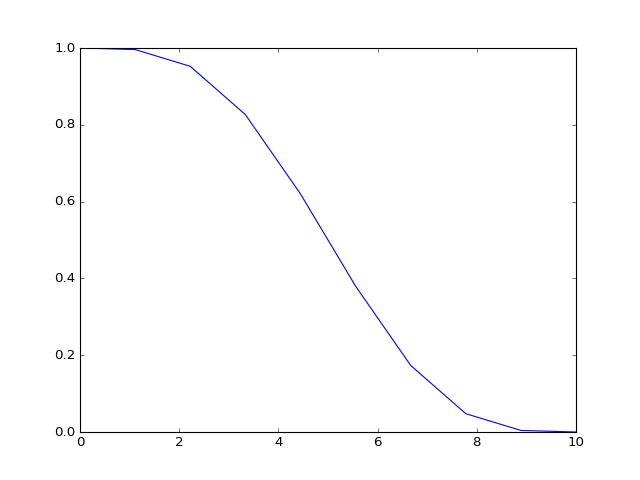

In [1]:
%matplotlib notebook
# This piece of code shows taper function
import numpy as np
import matplotlib.pyplot as plt

def taper(r):
    rcut=10
    Taper= np.ones(shape=(len(r)))
    Tap = np.zeros(shape=(8,1))
    Tap[0]=1
    Tap[1]=0
    Tap[2]=0
    Tap[3]=0
    Tap[4]=-35.0/(rcut**4)
    Tap[5]=84.0/(rcut**5)
    Tap[6]=-70.0/(rcut**6)
    Tap[7]=20.0/(rcut**7)
    Taper=Tap[0]*r**0 + Tap[4]*r**4 +Tap[5]*r**5+Tap[6]*r**6+Tap[7]*r**7            
    return Taper

dist= np.linspace(0,10,10)
f=taper(dist)
plt.plot(dist,f)
plt.show()



### Vanderwaals Interactions
A distance corrected Morse-potential is used for van der Waals interactions. 

<IPython.core.display.Javascript object>


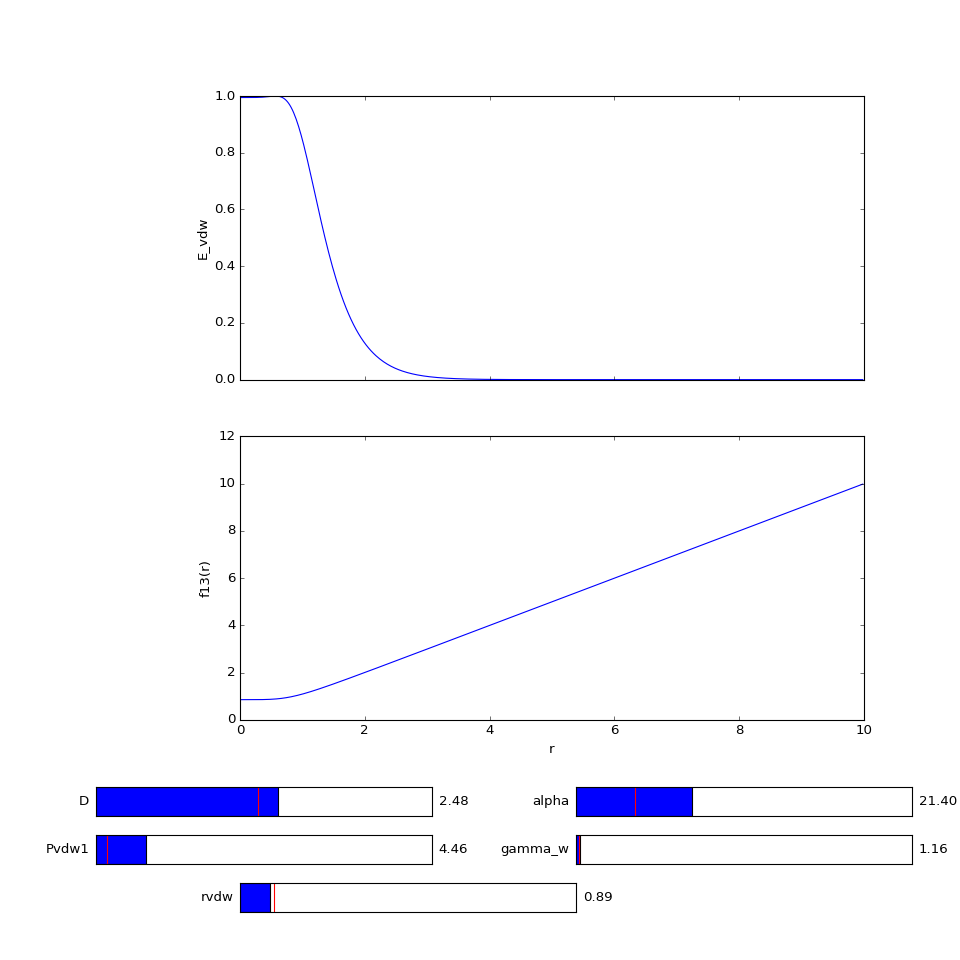

In [223]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

#************** List of parameters for vandwewaals *****************************
#
#
#
#
#*******************************************************************************

#parametrer list
pvdw1=1.0
gamma_w=1.0
D=-1.0
alpha=1
rvdw=1

# The value of x axis usually the distance of bondorder
r=np.arange(0,10,0.02)
Tap= taper(r)
#print (Tap)

fig,axes = plt.subplots(2,1,sharex=True,figsize=(12,12))
plt.subplots_adjust(left=0.25, bottom=0.25)

temp=np.power(r,pvdw1)+np.power((1.0/gamma_w),pvdw1)
f13=np.power(temp,1.0/pvdw1)
brac= 1-(f13/rvdw)
E_vdw=Tap*D*(np.exp(alpha*brac) - 2*np.exp(0.5*alpha*brac))




axes[1].set_xlabel('r')
axes[1].set_ylabel('f13(r)')
axes[0].set_ylabel('E_vdw')
l, = axes[1].plot(r,f13)
j, = axes[0].plot(r,E_vdw)
#plt.axis([-1, 5, -1, 5])



sfreq = Slider(plt.axes([0.1, 0.1, 0.35, 0.03]), 'Pvdw1', 0,30.0, valinit=pvdw1)
samp = Slider(plt.axes([0.60, 0.1, 0.35, 0.03]), 'gamma_w', 0, 100.0, valinit=gamma_w)
sD = Slider(plt.axes([0.1, 0.15, 0.35, 0.03]), 'D', -30,30.0, valinit=D)
salpha = Slider(plt.axes([0.60, 0.15, 0.35, 0.03]), 'alpha', -20, 100.0, valinit=alpha)
srvdw= Slider(plt.axes([0.25, 0.05, 0.35, 0.03]), 'rvdw', 0, 10.0, valinit=rvdw)

def update(val):
    gamma_w = samp.val
    pvdw1 = sfreq.val
    D=sD.val
    alpha = salpha.val
    rvdw = srvdw.val
    temp=np.power(r,pvdw1)+np.power((1.0/gamma_w),pvdw1)
    f13=np.power(temp,1.0/pvdw1)
    brac= 1-(f13/rvdw)
    E_vdw=Tap*D*(np.exp(alpha*brac) - 2*np.exp(0.5*alpha*brac))
    l.set_ydata(f13)
    j.set_ydata(E_vdw)
    fig.canvas.draw_idle()

sfreq.on_changed(update)
samp.on_changed(update)
sD.on_changed(update)
salpha.on_changed(update)
srvdw.on_changed(update)

#plt.tight_layout()
plt.show()






### Analysis
D --> controls the depth of the well  Init values: (0-100) <br />
alpha --> controls the width of the well Init values: (0:70)<br /> ideal : (0,5)
rvdw--> controls minima position( not exact minima position) and depth Init values:(0-10) <br />
Gamma --> Very high value might be redundant. Init values :(0-10)     or (0-5)<br />


# Coulumb interaction
coulumb interactions are taken into account between all atom pairs. 




<IPython.core.display.Javascript object>


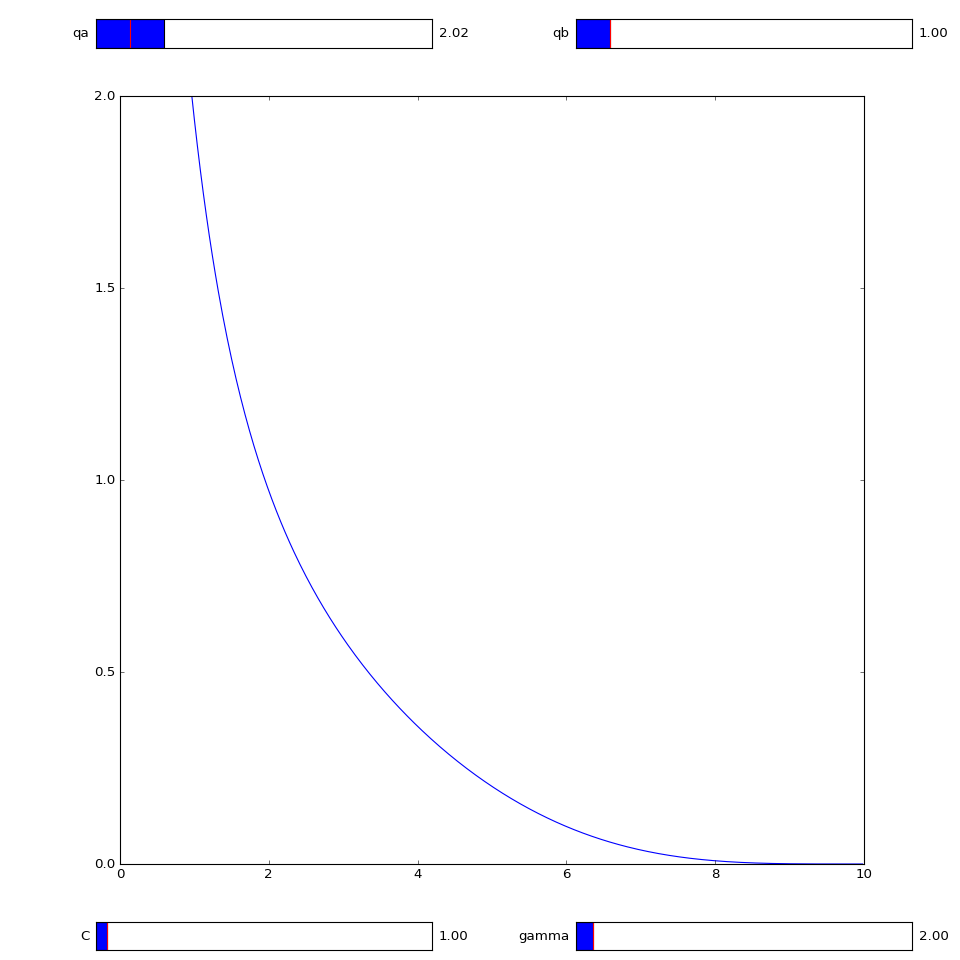

In [265]:
# parameter list

qa=1.0
qb=1.0
C=1.0
gamma=2.0

denom= np.power((np.power(r,3) + np.power((1.0/gamma),3)),1.0/3.0) 
E_cou = Tap*C*qa*qb/denom


fig,axes=plt.subplots(figsize=(12,12))
l, = axes.plot(r,E_cou)

sqa = Slider(plt.axes([0.1, 0.95, 0.35, 0.03]), 'qa', 0,10.0, valinit=qa)
sqb = Slider(plt.axes([0.60, 0.95, 0.35, 0.03]), 'qb', 0, 10.0, valinit=qb)
sC = Slider(plt.axes([0.1, 0.01, 0.35, 0.03]), 'C', 0,30.0, valinit=C)
sgamma = Slider(plt.axes([0.60, 0.01, 0.35, 0.03]), 'gamma', 0, 40.0, valinit=gamma)


def update_coulumb(val):
    qa=sqa.val
    qb=sqb.val
    C=sC.val
    gamma=sgamma.val
    denom= np.power((np.power(r,3) + np.power((1.0/gamma),3)),1.0/3.0)
    E_cou = Tap*C*qa*qb/denom
    l.set_ydata(E_cou)
    fig.canvas.draw_idle()

sqa.on_changed(update_coulumb)
sqb.on_changed(update_coulumb)
sC.on_changed(update_coulumb)
sgamma.on_changed(update_coulumb)

#plt.tight_layout()
plt.show()
    
    


# Three body term
## Angle energy
The valence angle energy term helps to reproduce the valence angles in molecules? 


# E-bond


<IPython.core.display.Javascript object>


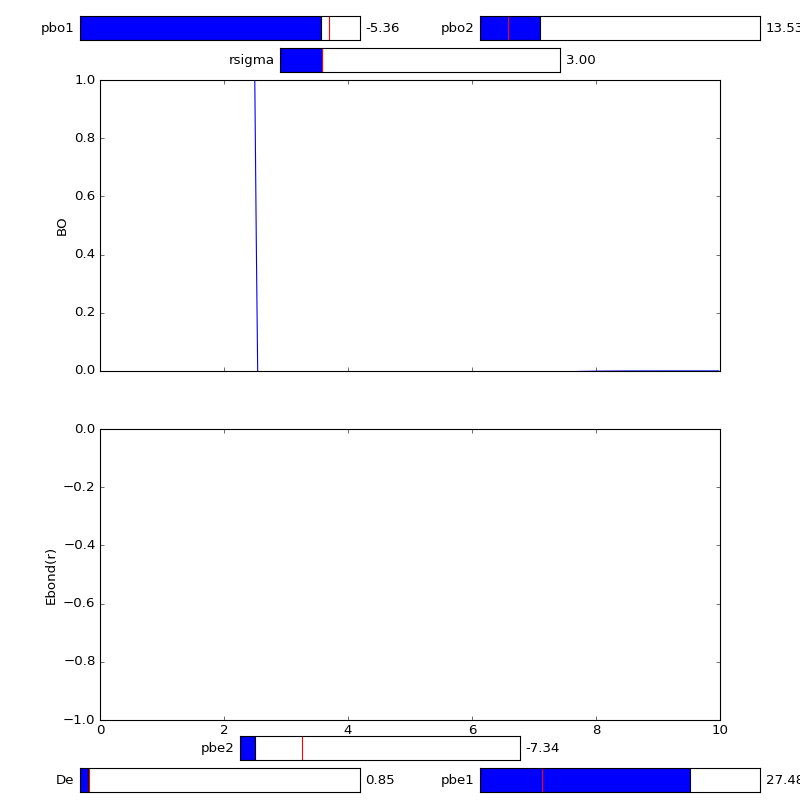

0

In [220]:
# Parameter list 
pbo1=-2.0
pbo2=1.0
rsigma=3.0
De=1.0
pbe1=1.0
pbe2=1.0

BO = np.exp(pbo1*(r/rsigma)**pbo2)
Ebond = -De*BO*np.exp(pbe1*(1-(BO)**pbe2))


fig,axes = plt.subplots(2,1,sharex=True,figsize=(10,10))

axes[1].set_xlabel('r')
axes[1].set_ylabel('Ebond(r)')
axes[0].set_ylabel('BO')

j, = axes[0].plot(r,BO)
l, = axes[1].plot(r,Ebond)

spbo1 = Slider(plt.axes([0.1, 0.95, 0.35, 0.03]), 'pbo1', -100,10.0, valinit=pbo1)
spbo2 = Slider(plt.axes([0.60, 0.95, 0.35, 0.03]), 'pbo2', -10, 100.0, valinit=pbo2)
srsigma = Slider(plt.axes([0.35, 0.91, 0.35, 0.03]), 'rsigma', 0,20.0, valinit=rsigma)

sDe = Slider(plt.axes([0.1, 0.01, 0.35, 0.03]), 'De', 0,30.0, valinit=De)
spbe1 = Slider(plt.axes([0.60, 0.01, 0.35, 0.03]), 'pbe1', -10, 40.0, valinit=pbe1)
spbe2=Slider(plt.axes([0.30, 0.05, 0.35, 0.03]), 'pbe2', -10, 40.0, valinit=pbe2)



def update_BO(val):
    pbo1=spbo1.val
    pbo2=spbo2.val
    rsigma=srsigma.val
    De= sDe.val
    pbe1=spbe1.val
    pbe2=spbe2.val 
    BO = np.exp(pbo1*(r/rsigma)**pbo2)
    Ebond = -De*BO*np.exp(pbe1*(1-(BO)**pbe2))
    l.set_ydata(Ebond)
    j.set_ydata(BO)

spbo1.on_changed(update_BO)
spbo2.on_changed(update_BO)
srsigma.on_changed(update_BO)

spbe1.on_changed(update_BO)
spbe2.on_changed(update_BO)
sDe.on_changed(update_BO)

#fig.tight_layout()

#Analysis
pbo1--> should be negative. Controls how fast the function decays to 0 Init : (-100,0)  ideal (-20,0)
pbo2 > 1                        Init: (1,100)  (1,20)
rsigma --> cut off till which BO is 1 

# Lone pair energy

<IPython.core.display.Javascript object>


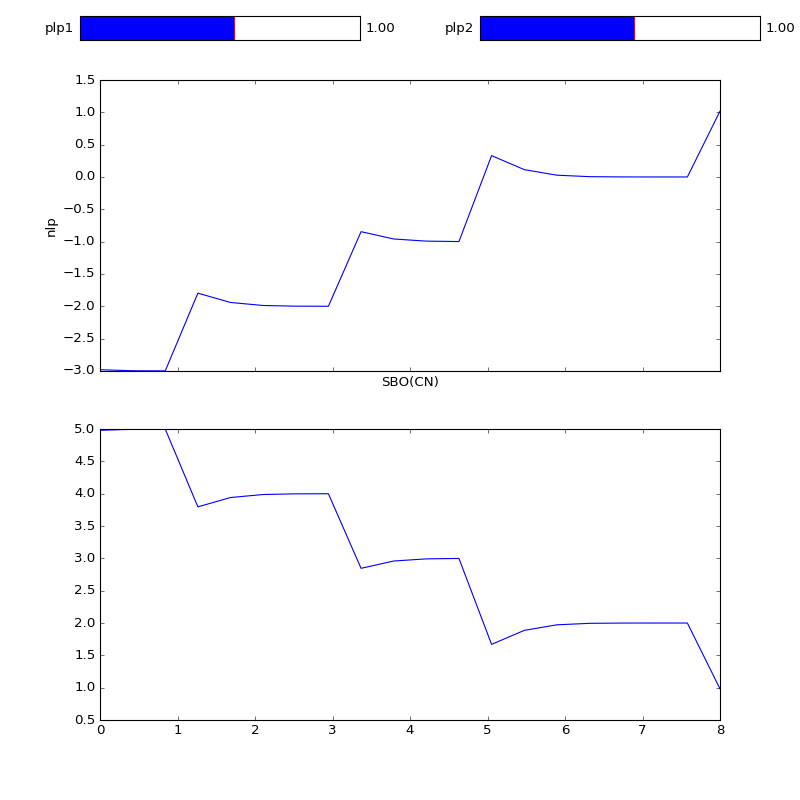

0

In [264]:
# parameter list

val=6
SBO=np.linspace(0,8,num=20)
delta_ie = -val + SBO # This parameter can be greater than 0 or less than 0
plp1=1.0
nlpopt=2.0
plp2=1.0


nlp= (delta_ie.astype(int))/2 + np.exp(-plp1*(2+delta_ie-2*(delta_ie.astype(int)/2))**2)


delta_ilp= nlpopt - nlp

E_lp=(plp2*delta_ilp)/(1+np.exp(-75*delta_ilp))

fig,axes = plt.subplots(2,1,sharex=True,figsize=(10,10))
axes[0].set_ylabel('nlp')
axes[0].set_xlabel('SBO(CN)')
m,= axes[0].plot(SBO,nlp)
j,= axes[1].plot(SBO,E_lp,)

splp1 = Slider(plt.axes([0.1, 0.95, 0.35, 0.03]), 'plp1', -10,10.0, valinit=plp1)
splp2 = Slider(plt.axes([0.6, 0.95, 0.35, 0.03]), 'plp2', -10,10.0, valinit=plp2)


def update_LP(val):
    plp1=splp1.val
    plp2=splp2.val
    nlp = (delta_ie.astype(int)/2) + np.exp(-plp1*(2+delta_ie-2*(delta_ie.astype(int)/2))**2)
    delta_ilp= nlpopt - nlp
    E_lp=(plp2*delta_ilp)/(1+np.exp(-75*delta_ilp))
    m.set_ydata(nlp)
    j.set_ydata(E_lp)
    
splp1.on_changed(update_LP)
splp2.on_changed(update_LP)



# Overcordination